In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
file_path = '/content/drive/MyDrive/Prodigy_Internship/online_shoppers_intention.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame to inspect the data
print(df.head())



   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Check for missing values
print(df.isnull().sum())

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree classifier with max depth of 3
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.889970262233036
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.94      0.94      3124
        True       0.66      0.62      0.63       575

    accuracy                           0.89      3699
   macro avg       0.79      0.78      0.79      3699
weighted avg       0.89      0.89      0.89      3699

Confusion Matrix:
 [[2938  186]
 [ 221  354]]


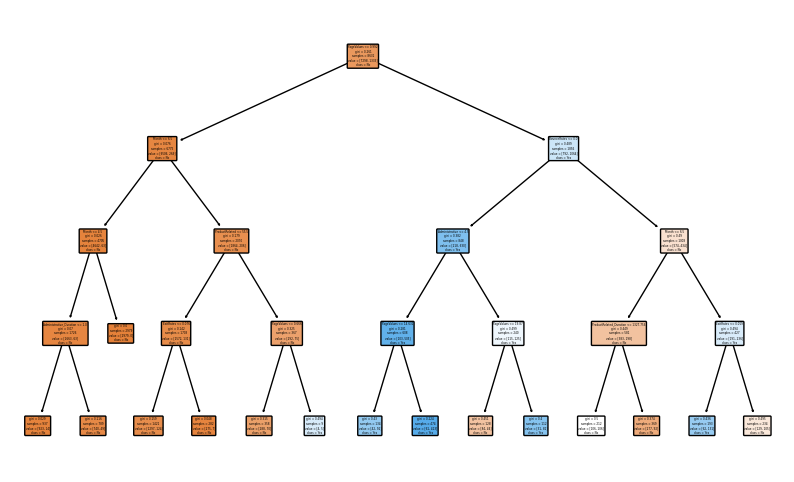

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(10,6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()


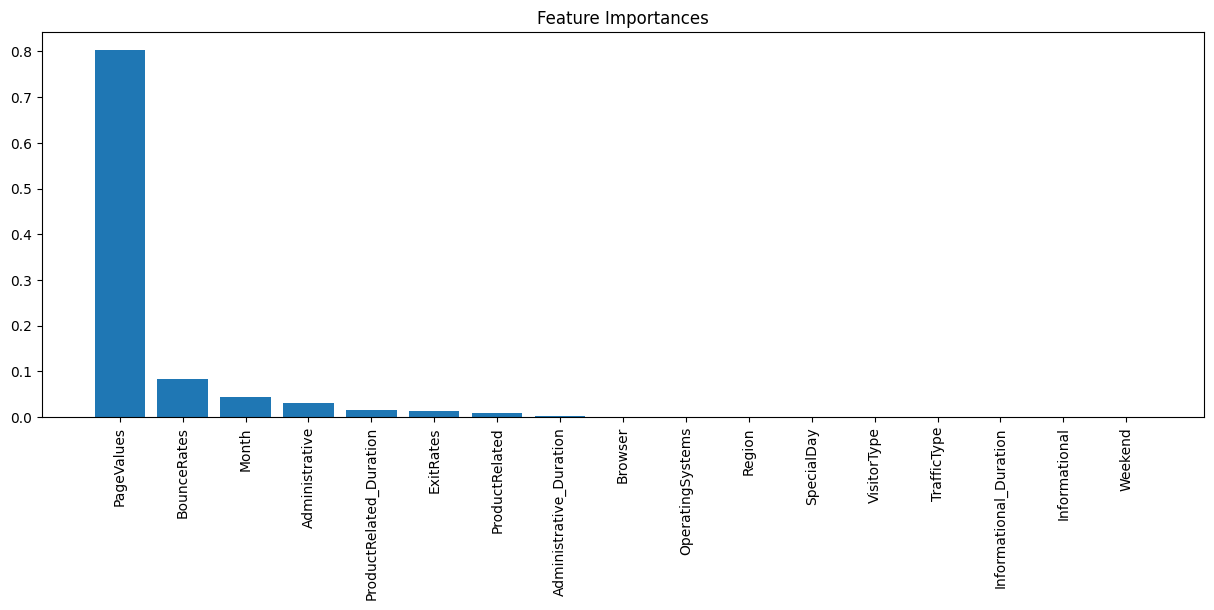

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np # Import numpy

# Plot feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()